In [1]:
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline

In [3]:
from pylab import *

In [4]:
path_img = 'D:/Salve_Aqui_Seus_Arquivos/Carlos_Alexandre/2024-2/teti/teti_imagens/'

In [5]:
im1 = array(Image.open(path_img + 'objetos.jpg'))

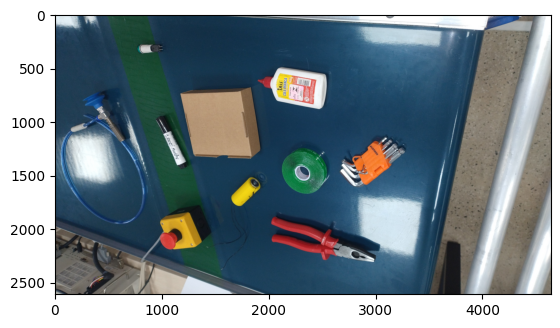

In [6]:
imshow(im1)

In [7]:
corte_ferramenta = im1[1000:1500, 2500:3500]

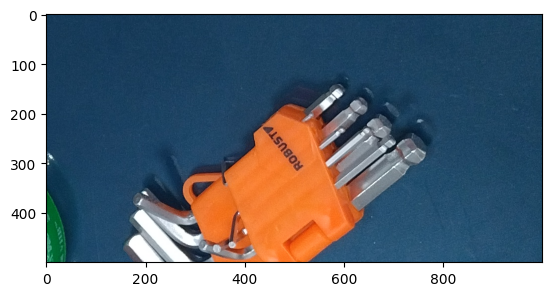

In [8]:
imshow(corte_ferramenta)

In [9]:
corte_cola = im1[500:1000, 1800:2800]

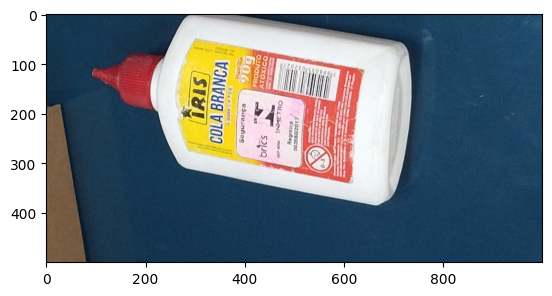

In [10]:
imshow(corte_cola)

In [11]:
np.save('img_ferramenta_corte', corte_ferramenta)

In [12]:
np.save('img_cola_corte', corte_cola)

In [13]:
# Função para recortar usando 4 parametros
def recortar_imagem(img, y_ini, y_fim, x_ini, x_fim):
    corte = img[y_ini:y_fim, x_ini:x_fim]
    imshow(corte)

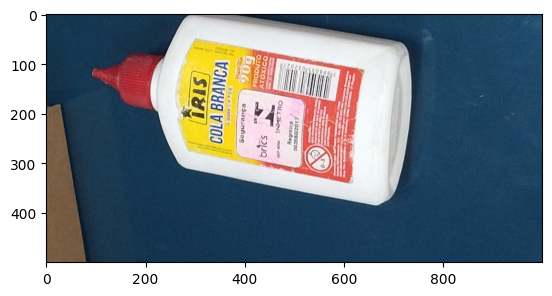

In [14]:
z = recortar_imagem(im1, 500, 1000, 1800, 2800)

5 Transformações

In [15]:
def plot_4img(im1, tit1, im2, tit2, im3, tit3, im4, tit4, tam):
    figure(figsize = tam)
    plt.subplot(1,4,1), plt.imshow(im1), plt.title(tit1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,4,2), plt.imshow(im2), plt.title(tit2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,4,3), plt.imshow(im3), plt.title(tit3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(1,4,4), plt.imshow(im4), plt.title(tit4)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [16]:
im1 = array(Image.open(path_img + 'cheetah.jpg'))
im2 = array(Image.open(path_img + 'cheetah.jpg'))
im3 = array(Image.open(path_img + 'cobra.jpg'))
im4 = array(Image.open(path_img + 'gato6.jpg'))

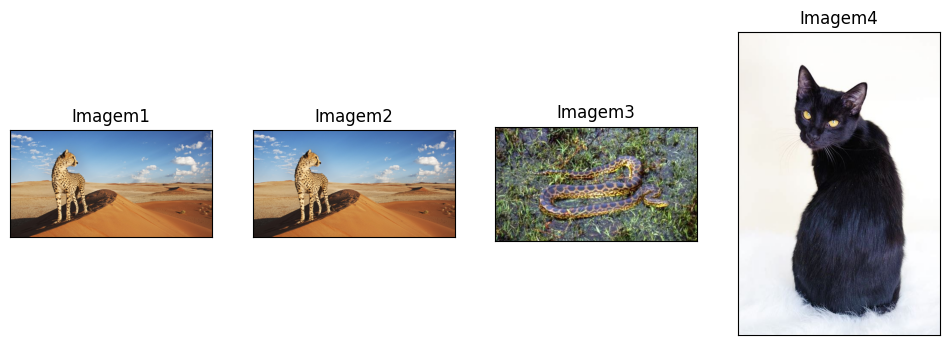

In [17]:
plot_4img(im1, 'Imagem1', im2, 'Imagem2', im3, 'Imagem3', im4, 'Imagem4', (12, 10))

In [18]:
im_r = im1[:, :, 0]
im_g = im1[:, :, 1]
im_b = im1[:, :, 2]

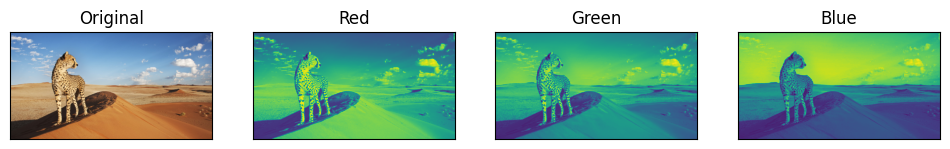

In [19]:
plot_4img(im1, 'Original', im_r, 'Red', im_g, 'Green', im_b, 'Blue', (12, 10))

In [20]:
import cv2

In [21]:
im_1cv = cv2.imread(path_img + 'cheetah.jpg')

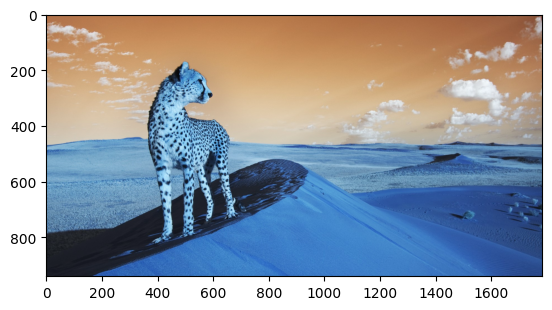

In [22]:
imshow(im_1cv)

In [23]:
im_1cv_rgb = cv2.cvtColor(im_1cv, cv2.COLOR_BGR2RGB)

In [24]:
imshow(im_1cv_rgb)im_1cv_rgb = cv2.cvtColor(im_1cv, cv2.COLOR_BGR2RGB)

SyntaxError: invalid syntax (1045716316.py, line 1)

In [25]:
im_1cv_hsv = cv2.cvtColor(im_1cv, cv2.COLOR_BGR2HSV)

In [26]:
im_1_h, im_1_s, im_1_v = cv2.split(im_1cv_hsv)

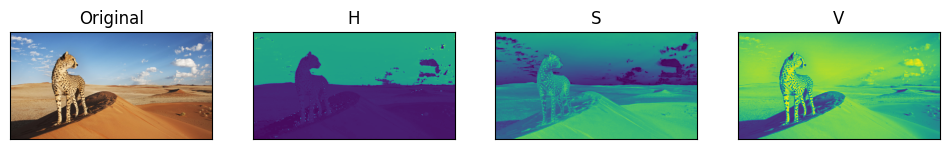

In [27]:
plot_4img(im1, 'Original', im_1_h, 'H', im_1_s, 'S', im_1_v, 'V', (12, 10))

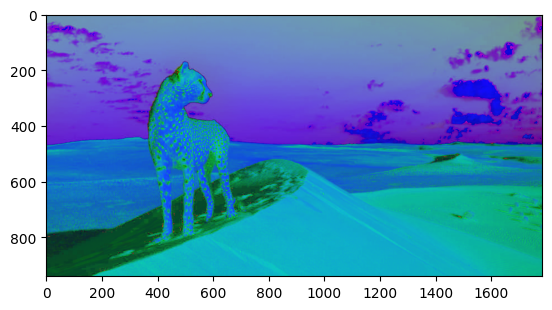

In [28]:
imshow(im_1cv_hsv)

In [29]:
img = cv2.imread(path_img + 'cheetah.jpg') 

In [30]:
def filtrar_cor(img, cor, limiar = 30):
    cor_alvo_hsv = cv2.cvtColor(np.uint8([[cor]]), cv2.COLOR_BGR2HSV)[0][0]
    lim_inf = np.array([max(0, cor_alvo_hsv[0] - limiar), 50, 50])
    lim_sup = np.array([min(179, cor_alvo_hsv[0] + limiar), 255, 255])
    im_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(im_hsv, lim_inf, lim_sup)
    return mask

In [ ]:
cor = input('Escolha R, G ou B: ')
limiar = int(input('Informe o limiar entre 0 e 100: '))
if cor == 'R':
    alvo = (0, 0, 255)
elif cor == 'G':
    alvo = (0, 255, 0)
elif cor == 'B':
    alvo = (255, 0, 0)
else:
    print('Cor inválida!')
filtro = filtrar_cor(img, alvo, limiar)
resultado = cv2.bitwise_and(img, img, mask = filtro)
cv2.imshow('Original', img)
cv2.imshow('Cor filtro', resultado)
cv2.waitKey(0)
cv2.destryAllWindows


Escolha R, G ou B:  B
Informe o limiar entre 0 e 100:  10


In [10]:
im = cv2.imread(path_img + 'arara2.jpg')
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
lim_inf = np.array([130, 50, 0])
lim_sup = np.array([179, 255, 255])
mask = cv2.inRange(im_hsv, lim_inf, lim_sup)

In [11]:
im = cv2.imread(path_img + 'arara2.jpg')
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
lim_inf = np.array([100, 50, 0])
lim_sup = np.array([150, 255, 255])
mask = cv2.inRange(im_hsv, lim_inf, lim_sup)

In [12]:
resultado = cv2.bitwise_and(im, im, mask = mask)
cv2.imshow('Cor detectada', np.hstack((im, resultado)))
cv2.waitKey(0)
cv2.destroyAllWindows()